In [1]:
import torch
import torch.nn.init
from torch.autograd import Variable

In [2]:
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

## Loading MNIST dataset

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,                          # 여기만 다름
                         transform=transforms.ToTensor(),
                         download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, '5')

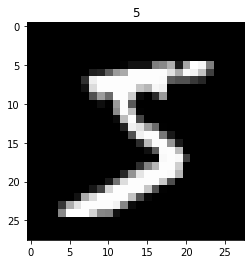

In [5]:
print(mnist_train.train_data.size())
print(mnist_train.train_labels.size())

idx=0
plt.imshow(mnist_train.train_data[idx,:,:].numpy(), cmap='gray')
plt.title('%i' % mnist_train.train_labels[idx])

## Data Loader

In [6]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


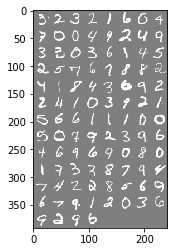

array([3, 2, 3, 2, 1, 6, 0, 4, 7, 0, 0, 4, 9, 2, 4, 9, 3, 3, 0, 3, 6, 1,
       4, 5, 2, 5, 7, 6, 7, 8, 8, 2, 4, 1, 8, 4, 3, 6, 9, 2, 2, 4, 1, 0,
       3, 9, 2, 1, 5, 6, 6, 1, 1, 1, 0, 0, 5, 0, 7, 9, 2, 3, 9, 6, 4, 6,
       9, 6, 9, 0, 8, 0, 1, 7, 3, 3, 8, 7, 9, 4, 7, 4, 2, 2, 8, 5, 6, 9,
       6, 7, 9, 1, 2, 0, 3, 6, 9, 2, 9, 6])

In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

#숫자 100개 표시
imshow(utils.make_grid(batch_images))
batch_labels.numpy()

## Define Neural Network

In [8]:
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 10, bias = True)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, linear2)  # 순서 주의. 마지막은 relu 아니고 아래에서 CrossEntropyLoss에 넣기 위함

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)


In [9]:
cost_func = torch.nn.CrossEntropyLoss()
# Softmax 내장

## Mdel Training

In [10]:
learning_rate = 0.001
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()
        Y_prediction = model(X)
        cost = cost_func(Y_prediction, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data))
    
print("Learning Ginished!")

[Epoch:    1] cost = 0.289389491
[Epoch:    2] cost = 0.114351809
[Epoch:    3] cost = 0.0738913715
[Epoch:    4] cost = 0.0532327555
[Epoch:    5] cost = 0.0402688645
Learning Ginished!


In [11]:
torch.save(model.state_dict(), 'pkl/NN.pkl')
model.load_state_dict(torch.load('pkl/NN.pkl'))    # 파일이 있으면 불러올 수 있음
print(model[0].weight.shape, model[2].weight.shape)    
# 결과가 torch.Size([512, 784]) torch.Size([10, 512]) 이므로 혼동 주의. 
# model[1]은 ReLU 이므로 weight 없음. 

print(model.state_dict())

torch.Size([512, 784]) torch.Size([10, 512])
OrderedDict([('0.weight', tensor([[-0.0240, -0.0135,  0.0149,  ..., -0.0213,  0.0201, -0.0121],
        [-0.0137, -0.0306,  0.0253,  ..., -0.0235,  0.0345,  0.0195],
        [-0.0044,  0.0110, -0.0329,  ...,  0.0256, -0.0011, -0.0250],
        ...,
        [-0.0266, -0.0172,  0.0062,  ...,  0.0248,  0.0037,  0.0329],
        [ 0.0304,  0.0351, -0.0201,  ..., -0.0228, -0.0174,  0.0216],
        [ 0.0338, -0.0093, -0.0219,  ..., -0.0029, -0.0171, -0.0274]])), ('0.bias', tensor([ 4.7832e-02,  6.2560e-02,  5.2808e-02,  9.9430e-02, -9.9712e-03,
         6.8854e-02, -4.5627e-02,  6.4943e-02, -1.3374e-02, -1.4634e-02,
         2.8028e-02,  7.1119e-02,  5.1601e-04, -4.3304e-02, -1.1550e-02,
        -4.2912e-02, -3.8702e-02,  4.8065e-04, -2.4668e-02,  8.8586e-02,
         3.5363e-02, -4.3203e-03,  6.2457e-02,  8.3990e-02,  4.3403e-02,
         3.8167e-02,  6.2688e-03,  3.3711e-02, -2.0356e-02,  1.5395e-02,
        -2.5249e-02, -1.4583e-02,  5.8945e-0

## Measure performance

In [12]:
correct = 0
total = 0
for images, labels in mnist_test:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


## Random test

In [13]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/cloudera/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label :  [4]
Prediction :  [4]


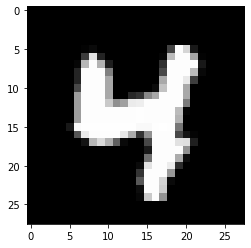

In [14]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())

0


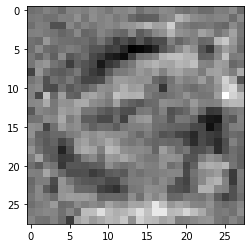

1


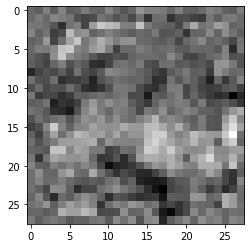

2


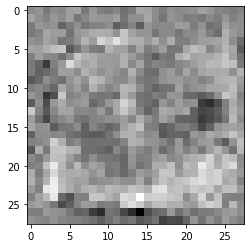

3


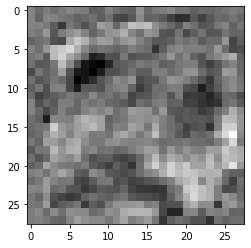

4


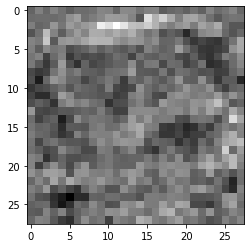

5


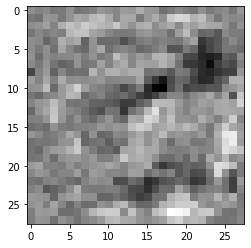

6


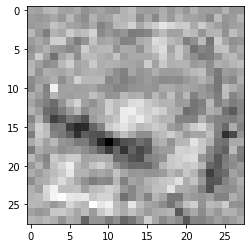

7


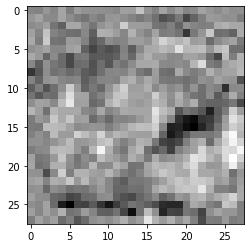

8


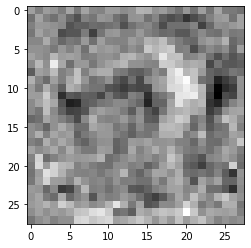

9


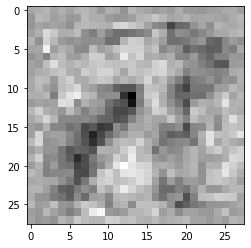

10


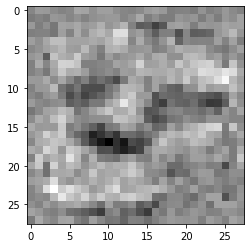

11


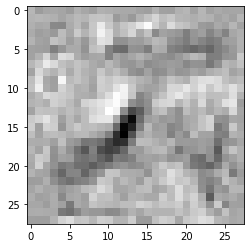

12


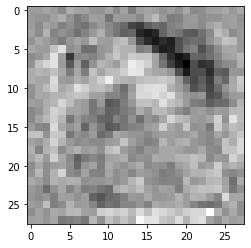

13


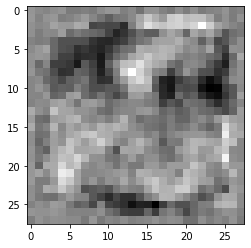

14


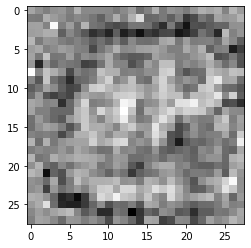

15


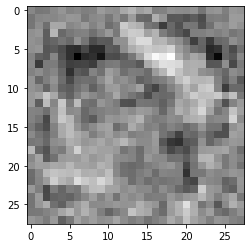

16


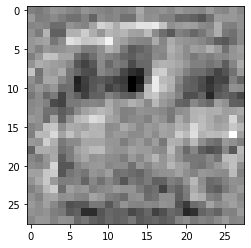

17


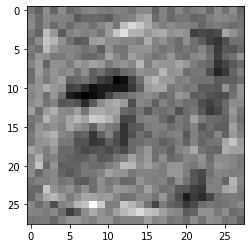

18


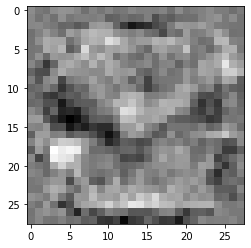

19


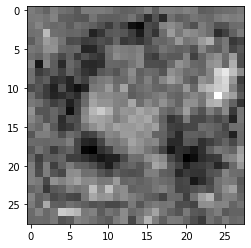

In [15]:
for i in range(20):            # 중앙의 hidden layer 512개 중 상위 20개로 가는 weight들만 확인
    weight = model[0].weight[i, :].data.view(28,28)   # 앞서 model[0].weight의 shape이 (512, 784)이고, 입력단이 784임.
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    print(i)
    plt.imshow(weight.numpy(), cmap='gray')
    plt.show()